<div>
<img src="../images/mdsi_logo.png" width="200"/>
</div>

# Exploratory Data Analysis Guide
Exploratory Data Analysis (or EDA for short) is one of the most essential steps in the machine learning lifecycle. In this step, you will discover insights about your data that could potentially lead to you solving your research problem. The EDA process is an iterative step in the machine learning lifecycle. You may start with an initial exploration but later in your project, you may find the need to perform additional analysis or visualization on some aspect of the data that you find interesting or puzzling.

The overall objective of this step is to find out how your data is distributed, how your variables are correlated, identify missing values, identify duplicate values, identify outliers, and any other unique properties about your variables and how they interact with each other. 

In this notebook, we will take a look at how to perform the following actions on our dataset:
- [ ]  Summary statistics
- [ ]  The cardinality of categorical variables
- [ ]  Distributions of numerical variables
- [ ]  Identify Outliers
- [ ]  Examine univariate relationships
- [ ]  Examine bivariate relationships
- [ ]  Correlation among key variables
- [ ]  Aggregates

<div>
<a href="https://clauswilke.com/dataviz/"><img src="../images/fundamentals_data_viz.png" width="200"/></a>
</div>
An excellent resource for data visualization (the charting aspects of EDA) is Claus Wilke's text, "Fundamentals of Data Visualization", which can be found <a href="https://clauswilke.com/dataviz/">here</a>.

# Import Libraries

In [2]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Import Dataset
# Pandas is a rich library with many functions to work with datasets. We import it and use it to read the csv file.

import pandas as pd
df = pd.read_csv('..\datasets\seoul_bike_data.csv', encoding='ISO-8859-1')

# We use the head method to check the first 5 rows of the dataset.
df.sample(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3637,01/05/2018,1493,13,23.0,63,3.1,494,15.5,1.92,0.0,0.0,Spring,Holiday,Yes
5089,01/07/2018,740,1,22.7,87,0.5,1072,20.4,0.00,0.0,0.0,Summer,No Holiday,Yes
5696,26/07/2018,1823,8,28.3,72,0.8,1165,22.7,0.34,0.0,0.0,Summer,No Holiday,Yes
1102,15/01/2018,333,22,3.0,61,1.6,460,-3.8,0.00,0.0,0.0,Winter,No Holiday,Yes
7704,18/10/2018,694,0,9.2,64,0.7,2000,2.7,0.00,0.0,0.0,Autumn,No Holiday,Yes
1585,05/02/2018,52,1,-11.2,54,1.0,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5743,28/07/2018,428,7,28.4,82,0.7,748,25.0,0.16,0.0,0.0,Summer,No Holiday,Yes
6816,11/09/2018,910,0,20.1,52,1.5,2000,9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
2168,01/03/2018,148,8,1.5,80,3.2,1246,-1.5,0.04,0.0,0.0,Spring,Holiday,Yes
5663,24/07/2018,1193,23,29.3,66,2.8,1854,22.2,0.00,0.0,0.0,Summer,No Holiday,Yes


# Getting Metadata

In [4]:
# Pandas info method provides metadata about the dataset.
# Metadata is important because it provides information about the data types of the columns in the dataset.
# Knowing the data types of your dataset will help you to know how to handle specific columns in your analysis.
# There is also other useful information such as the how many rows, how many colums.

import pandas as pd
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

# Getting the Shape the Data

In [5]:
# If you just want to know how many rows and columns are in your dataset, you can use pandas shape method.

df.shape

(8760, 14)

In [6]:
# If you want to make your code more readable, you can use the print function and f-strings.
# Combining this with indexing will make your code easier to read.

print(f"The number of rows in the dataset is: {df.shape[0]}")
print(f"The number of columns in the dataset is: {df.shape[1]}")

The number of rows in the dataset is: 8760
The number of columns in the dataset is: 14


# Summary Statistics

At the start of any data project, it is always a good idea to get a sense of basic descriptive statistics. For a quick and easy to follow background on descriptive statistics, please read: https://www.questionpro.de/en/deskriptive-statistik/

In [7]:
# Pandas describe method prints summary statistics for numeric variables.
# The round function is used to round the summary statistics to 2 decimal places.
# The T method is used to transpose the summary statistics.
# This technique of using multiple methods and functions in one line is called chaining.

import pandas as pd
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.60,645.00,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.50,6.92,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.88,11.94,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.23,20.36,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.72,1.04,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.83,608.30,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.07,13.06,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.57,0.87,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.15,1.13,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.08,0.44,0.0,0.00,0.00,0.00,8.80


## Cardinality of Categorical Variables

In [8]:
# Before we can check the cardinality of the categorial variables, we first need to identify them, then assign them to a new variable.

categorical_variables = df.select_dtypes(include=['object']).columns
categorical_variables

Index(['Date', 'Seasons', 'Holiday', 'Functioning Day'], dtype='object')

Uh-oh, it seems like we have a column that was assigned an incorrect data type. Can you guess which one?
This is a common occurrence when working with datasets, which is why it is very important to check your metadata and use the head, tail and sample methods to thoroughly investigate your data.In this case, the column that is out of place is the Date column. Python has a special data type for dates. It's called datetime.
I will show you how to convert the Date column from object to datetime in the next cell.

In [9]:
# Convert Date column to datetime format

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8760 entries, 0 to 8759
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
8760 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 68.6 KB


In [10]:
# When you're using notebooks, you must run the code cells in order of sequence.
# In some cases, like this one, since we performed a transformation on a variable, we will need to re-run the code.
# This is why modular programming makes our lives so much easier. Using classes and functions to modularize our code helps us from repeating ourselves.
# DRY (Do not repeat yourself) principle is an important principle in OOP software engineering.

categorical_variables = df.select_dtypes(include=['object']).columns
categorical_variables

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [11]:
df.nunique().sort_values(ascending=False)

Rented Bike Count            2166
Visibility (10m)             1789
Dew point temperature(°C)     556
Temperature(°C)               546
Date                          365
Solar Radiation (MJ/m2)       345
Humidity(%)                    90
Wind speed (m/s)               65
Rainfall(mm)                   61
Snowfall (cm)                  51
Hour                           24
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

# Brief Statistics Interlude: Distributions

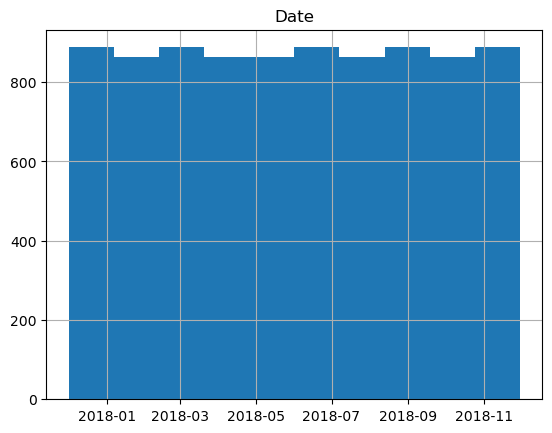

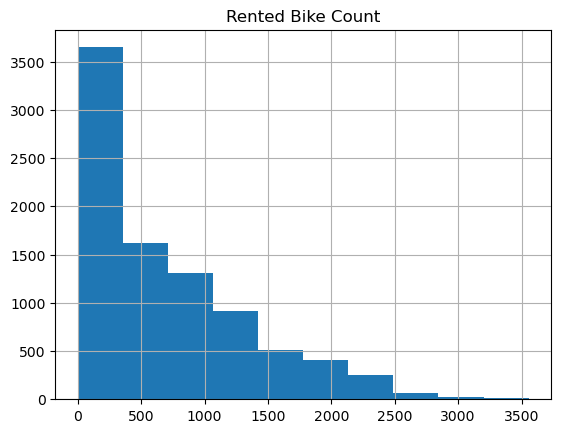

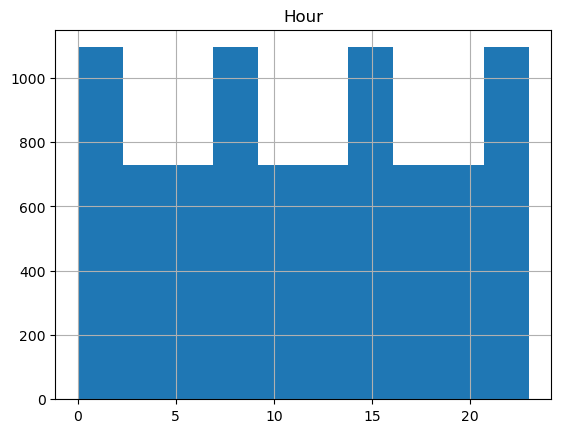

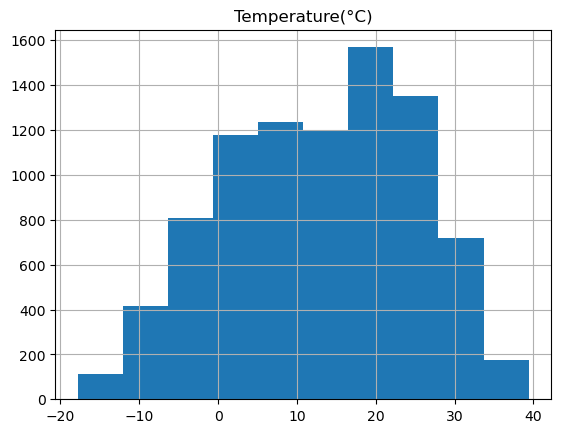

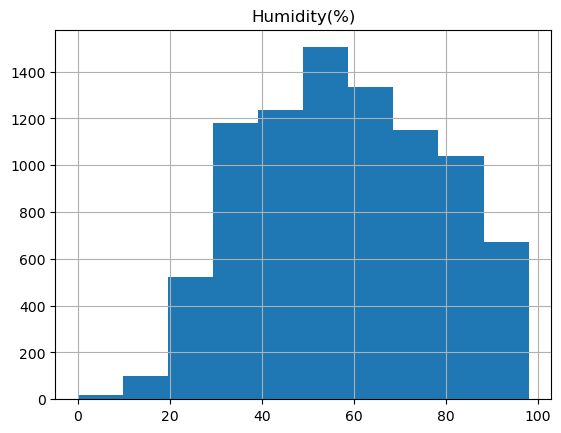

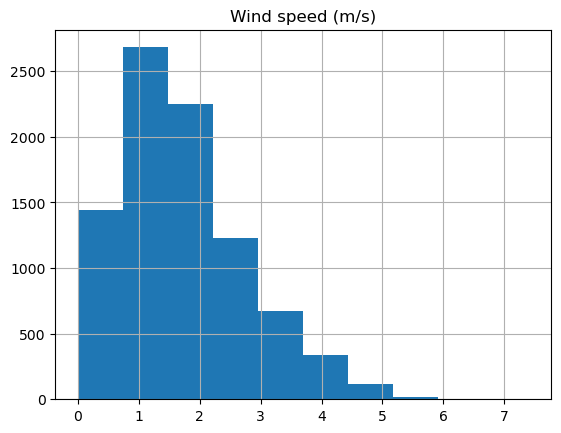

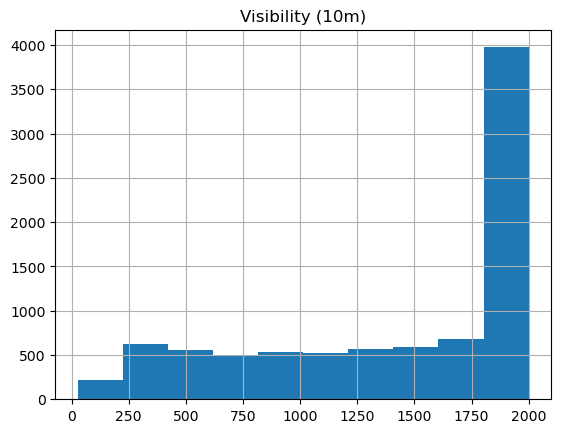

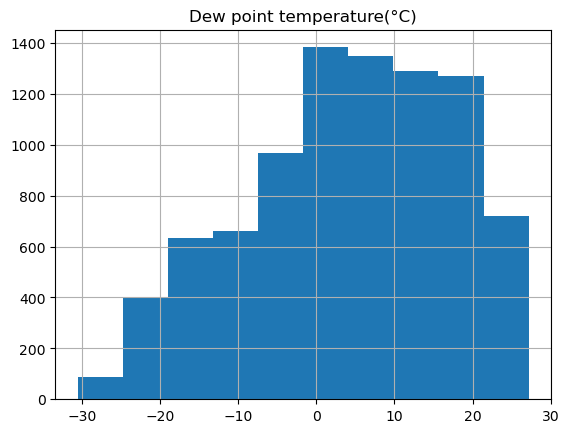

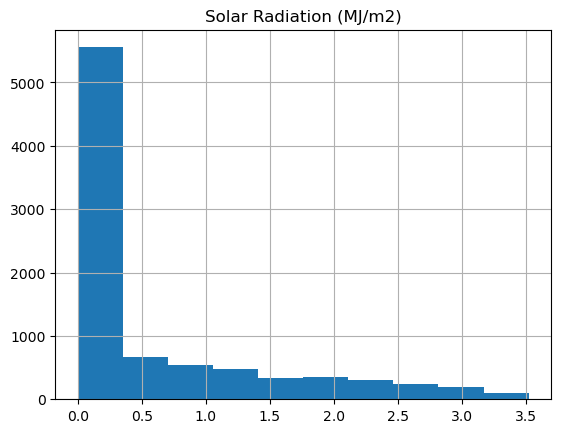

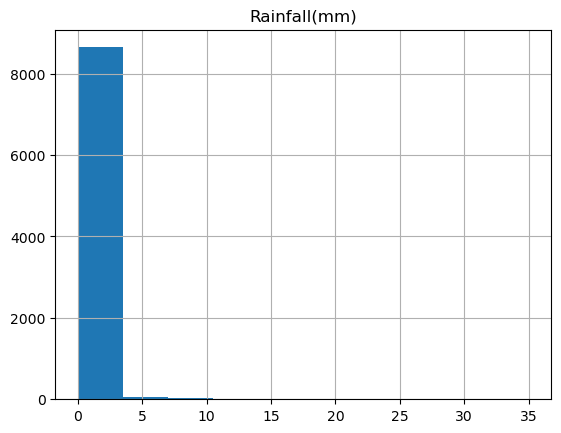

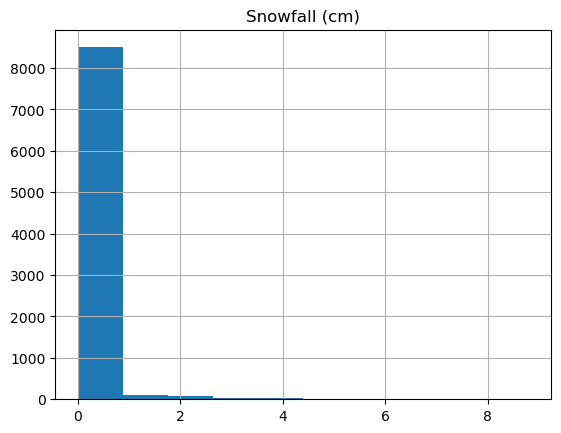

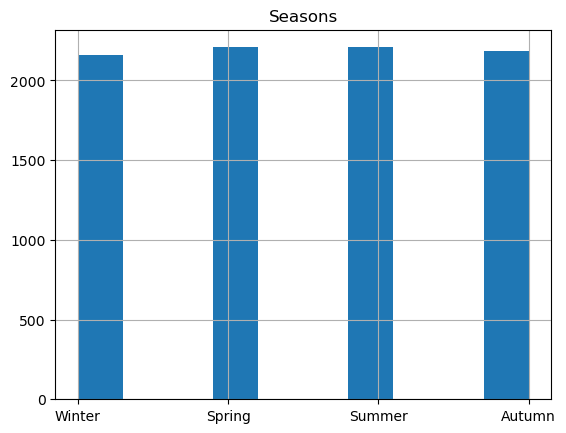

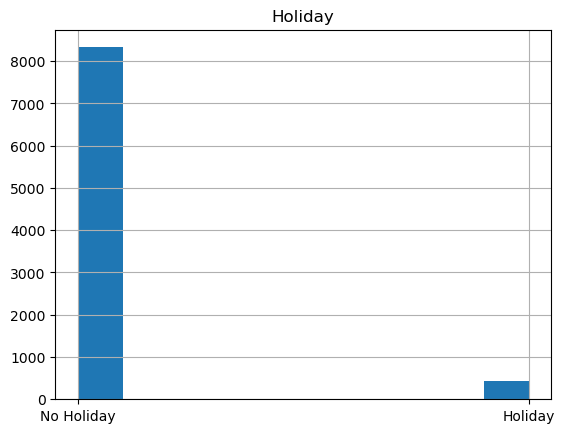

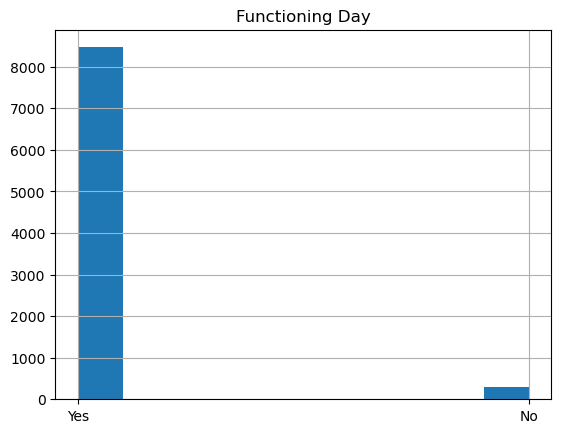

In [14]:
# To visualize the distribution of numerical variables, we will use pandas hist function.
# Because we have so many numerical variables, we will use a for loop to plot them.

for column in df.columns:
    df[column].hist()
    plt.title(column)
    plt.show()

## Common Distributions of Numerical Variables

In statistics, there are two broad categories of distributions: discrete and continuous.

Discrete Distributions include:

1. Bernoulli Distribution - This is a distribution that models the probability of a single trial with two possible outcomes (E.g. a coin toss).

The following graph represents a bernoulli distribution.

<img src="https://upload.wikimedia.org/wikipedia/commons/7/74/Bernoulli_Distribution.PNG" alt="Bernoulli Distribution" title="Bernoulli Distribution" width="50%">

---


2. Binomial Distribution - This is a distribution that models the number of successes in a fixed number of independent trials, each with a constant probability of success. Binomial distributions are most commonly observed in target features in classification problems (e.g. a coin toss repeated several times). 

<img src="https://upload.wikimedia.org/wikipedia/en/c/cc/Binomial_distribution_pdf.png" alt="Binomial Distribution" title="Binomial Distribution" width="50%">

---

3. Poisson Distribution -

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/Poisson_pmf.svg/1280px-Poisson_pmf.svg.png" alt="Poisson Distribution" title="Poisson Distribution" width="50%">

---

Continuous Distributions include:

1. Uniform Distribution

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c2/Uniform_distribution.svg" alt="Uniform Distribution" title="Uniform Distribution" width="50%">


2. Normal Distribution

<img src="https://upload.wikimedia.org/wikipedia/commons/3/32/Normal_Distribution_Sigma.svg" alt="Normal Distribution" title="Normal Distribution" width="50%">

3. Exponential Distribution

<img src="https://upload.wikimedia.org/wikipedia/commons/0/02/Exponential_probability_density.svg" alt="Exponential Distribution" title="Exponential Distribution" width="50%">


## Outliers in Exploratory Data Analysis
Another important aspect of EDA is to identify values that may fall outside of the scope of typical values. Outliers are data points that significantly differ from other observations in a dataset.These data points  stand out from the rest of your data, like a very tall person in a group photo or a surprisingly expensive item in your shopping cart. In data science, identifying and understanding these unusual points is crucial because they can significantly affect your analysis and the conclusions you draw from your data.



### Introduction to Outliers
Outliers can occur due to various reasons:

Measurement or data entry errors
Exceptional but genuine cases
Fraudulent activities
Natural extreme values in the distribution

It's important to identify outliers and make informed decisions on how to handle them based on the context of your data and analysis goals.

### Identifying Outliers
Let's explore two common methods for identifying outliers: 1) the Z-score method and 2) the Interquartile Range (IQR) method. We'll explain these in simple terms and then show how to implement them in Python.

#### 1. Z-score Method

The Z-score method identifies outliers based on how many standard deviations a data point is from the mean.

Imagine you're a teacher grading exam papers. Most scores fall within a typical range, but a few students might have exceptionally high or low scores. The Z-score method helps us identify these unusual scores.

Here's how it works:

- We calculate the average (mean) score for the class.
- We then determine how spread out the scores are using a measure called standard deviation.
- For each student's score, we calculate how many standard deviations it is away from the average. This number is called the Z-score.

If a score's Z-score is very high or very low (typically above 3 or below -3 threshold), we consider it an outlier.

Think of it like this: If you're 7 feet tall in a country where the average height is 5'6" with a standard deviation of 3 inches, you'd be many standard deviations above average - definitely an outlier!

Let's see how to do this in Python. This code will generate a larger dataset with 1000 normally distributed data points and 3 outliers:

In [23]:
import numpy as np
import pandas as pd
from scipy import stats

def identify_outliers_zscore(data, threshold=3):
    # Ensure the input is a numpy array
    data = np.array(data)
    
    # Calculate the Z-score for each data point
    z_scores = np.abs(stats.zscore(data))
    
    # Identify outliers: True for outliers, False for non-outliers
    outliers = z_scores > threshold
    
    return z_scores, outliers

# Generate a large dataset with normally distributed data and some outliers
np.random.seed(0)  # For reproducibility
normal_data = np.random.normal(loc=100, scale=15, size=1000)  # Mean=100, SD=15, n=1000
outliers_data = np.array([200, 210, 220])  # Adding some outliers
data = np.concatenate((normal_data, outliers_data))
exam_scores = pd.Series(data)

# Identify outliers using z-score method
z_scores, outliers = identify_outliers_zscore(exam_scores)

print("Exam scores:", exam_scores.values)
print("Z-scores:", z_scores)
print("Outliers (True means it's an outlier):", outliers)
print("Outlier values:", exam_scores[outliers])

Exam scores: [126.46078519 106.00235813 114.68106976 ... 200.         210.
 220.        ]
Z-scores: [1.67790997 0.39744741 0.94063508 ... 6.28062016 6.9065053  7.53239044]
Outliers (True means it's an outlier): [False False False ...  True  True  True]
Outlier values: 1000    200.0
1001    210.0
1002    220.0
dtype: float64


#### 2. Interquartile Range (IQR) Method

The IQR method uses the concept of quartiles to identify outliers. The IQR method is like focusing on the middle 50% of your data and then identifying anything that falls too far outside this range.
Imagine you're analyzing the prices of houses in a neighborhood:

First, we arrange all the house prices from lowest to highest.
We find three key points:

Q1 (1st Quartile): The price below which 25% of the houses fall
Q2 (Median): The middle price
Q3 (3rd Quartile): The price below which 75% of the houses fall


We calculate the IQR, which is the range between Q1 and Q3.
We then define a "normal" range: from (Q1 - 1.5 * IQR) to (Q3 + 1.5 * IQR).
Any house price falling outside this range is considered an outlier.

It's like saying, "Most houses in this neighborhood cost between $200,000 and $400,000. If a house costs less than $100,000 or more than $500,000, it's unusually cheap or expensive for this area."


Here's how we implement this in Python:

In [25]:
import pandas as pd

def identify_outliers_iqr(data, factor=1.5):
    # Calculate Q1, Q3, and IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the outlier range
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    
    # Identify outliers: True for outliers, False for non-outliers
    outliers = (data < lower_bound) | (data > upper_bound)
    
    return outliers

# Example usage
house_prices = pd.Series([150000, 160000, 170000, 180000, 190000, 200000, 210000, 220000, 500000])
outliers = identify_outliers_iqr(house_prices)

print("House prices:", house_prices)
print("Outliers (True means it's an outlier):", outliers)
print("Outlier values:", house_prices[outliers])

House prices: 0    150000
1    160000
2    170000
3    180000
4    190000
5    200000
6    210000
7    220000
8    500000
dtype: int64
Outliers (True means it's an outlier): 0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
dtype: bool
Outlier values: 8    500000
dtype: int64


In [26]:
def identify_outliers_iqr(data, factor=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return (data < lower_bound) | (data > upper_bound)

# Example usage
outliers_iqr = identify_outliers_iqr(df['values'])
print(df[outliers_iqr])

   values
4     100


In this example, a house price of 500000 would likely be identified as an outlier because it's much higher than the other prices in the neighborhood.
Both methods help us spot unusual data points, but they have different strengths:

The Z-score method is great when your data follows a normal distribution (like a bell curve).


The IQR method works well even when your data isn't normally distributed and is less affected by extreme outliers.

Understanding these methods will help you identify unusual patterns in your data, which is a crucial skill in data science. Remember, once you've identified outliers, the next step is to investigate why they exist and decide how to handle them in your analysis.

### Investigating Why Outliers Exist

Once you've identified outliers in your data, the next crucial step is to understand why they exist. This investigation is like being a detective – you're looking for clues to explain these unusual data points.

#### Common Reasons for Outliers

- Data Entry Errors: Sometimes, outliers are simply mistakes. Imagine you're recording people's ages, and you see a value of 250. It's likely someone accidentally added an extra digit!


- Measurement Errors: Your measuring tool might be faulty. If you're weighing boxes and one suddenly weighs 1000 times more than the others, your scale might have malfunctioned.


- Natural Extreme Values: Some outliers are real and important. In a study of household incomes, a few billionaires would be outliers but are genuinely part of the population.


- Changes in the System: Outliers can indicate important events. If you're tracking website traffic and see a huge spike, it might correspond to a successful marketing campaign.


- Fraudulent Activity: In fields like finance, outliers can signal fraud. An unusually large transaction in a bank account might need investigation.

#### Steps to Investigate Outliers

##### 1. Visualize the Data: Create plots like histograms or box plots to see where the outliers fall.

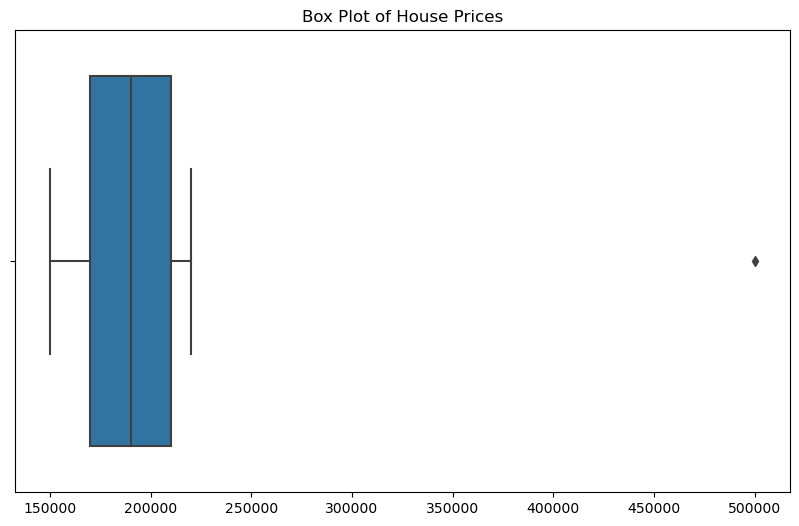

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=house_prices)
plt.title('Box Plot of House Prices')
plt.show()

##### 2. Check the Original Source: Go back to where the data came from. Was it entered correctly? Was there a note about unusual circumstances?

##### 3. Look for Patterns: Are the outliers related to specific conditions? Maybe all the outliers occur on weekends or in a particular location.

##### 4. Domain Knowledge: Use your understanding of the field. In a medical study, extreme values might indicate a new condition rather than an error.

##### 5.Cross-Reference: Check if the outlier makes sense when compared to other related data points.

#### Example Investigation
Let's say we're analyzing delivery times for a pizza company:

In [35]:
delivery_times = pd.Series([20, 25, 30, 35, 40, 120])
print("Delivery times (minutes):", delivery_times)
print("Outliers:", identify_outliers_iqr(delivery_times))

Delivery times (minutes): 0     20
1     25
2     30
3     35
4     40
5    120
dtype: int64
Outliers: 0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool


We see that 120 minutes is identified as an outlier. To investigate:

We visualize the data and confirm it's much higher than other values.
We check the original order and see it was placed during a severe thunderstorm.
We look for patterns and notice no other outliers that day.
Using our knowledge of pizza delivery, we know bad weather can cause delays.
We cross-reference with weather data and confirm a storm at that time.

Conclusion: This outlier is likely a genuine extreme value caused by unusual weather conditions.

### Treating Outliers

Once you've investigated your outliers, you need to decide how to handle them. There's no one-size-fits-all approach, but here are some common techniques:

#### Treatment #1: Removing Outliers
This is like taking a group photo and asking the unusually tall person to step out. It's simple but can lose important information.

**When to use:**

* When the outlier is clearly an error (like an age of 250 years).
* When you're certain the outlier doesn't represent your target population

In [36]:
def remove_outliers(data):
    outliers = identify_outliers_iqr(data)
    return data[~outliers]

cleaned_prices = remove_outliers(house_prices)
print("Original data:", house_prices)
print("Data with outliers removed:", cleaned_prices)

Original data: 0    150000
1    160000
2    170000
3    180000
4    190000
5    200000
6    210000
7    220000
8    500000
dtype: int64
Data with outliers removed: 0    150000
1    160000
2    170000
3    180000
4    190000
5    200000
6    210000
7    220000
dtype: int64


#### Treatment #2: Capping Outliers (Winsorization)
This is like telling the tall person in the photo to kneel down a bit. We're not removing them, just bringing them closer to the rest of the group.

**When to use:**

* When you want to reduce the impact of outliers without losing data points
* When outliers are extreme but potentially contain some information

In [45]:
def cap_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data.clip(lower=lower_bound, upper=upper_bound)

capped_prices = cap_outliers(house_prices)
print("Original data:", house_prices)
print("Data with outliers capped:", capped_prices)

Original data: 0    150000
1    160000
2    170000
3    180000
4    190000
5    200000
6    210000
7    220000
8    500000
dtype: int64
Data with outliers capped: 0    150000
1    160000
2    170000
3    180000
4    190000
5    200000
6    210000
7    220000
8    270000
dtype: int64


#### Treatment #3: Transforming Data

This is like using a special camera lens that makes everyone in the photo look more similar in height. 

We're changing how we view the data to reduce the impact of outliers.

**When to use:**

- When your data is skewed (not symmetrically distributed)
- When you want to preserve all data points but reduce the impact of extreme values

In [37]:
import numpy as np

def log_transform(data):
    return np.log1p(data)  # log1p is log(1+x), which handles zero values

transformed_prices = log_transform(house_prices)
print("Original data:", house_prices)
print("Log-transformed data:", transformed_prices)

Original data: 0    150000
1    160000
2    170000
3    180000
4    190000
5    200000
6    210000
7    220000
8    500000
dtype: int64
Log-transformed data: 0    11.918397
1    11.982935
2    12.043560
3    12.100718
4    12.154785
5    12.206078
6    12.254868
7    12.301387
8    13.122365
dtype: float64


#### Treatment #4: Treating Outliers as a Separate Category

Sometimes, outliers are interesting in their own right. Instead of removing or changing them, we might create a new category for them.

**When to use:**

- When outliers represent a meaningful subgroup in your data
- When you want to study both the main trend and the unusual cases

In [38]:
def categorize_outliers(data):
    outliers = identify_outliers_iqr(data)
    categories = pd.Series(['normal' if not outlier else 'outlier' for outlier in outliers])
    return pd.concat([data, categories.rename('category')], axis=1)

categorized_prices = categorize_outliers(house_prices)
print(categorized_prices)

        0 category
0  150000   normal
1  160000   normal
2  170000   normal
3  180000   normal
4  190000   normal
5  200000   normal
6  210000   normal
7  220000   normal
8  500000  outlier


Remember, the goal of treating outliers isn't always to get rid of them. Sometimes, outliers are the most interesting part of your data! 

The key is to handle them in a way that allows you to draw accurate and meaningful conclusions from your analysis.

### Impact of Outlier Treatment
Let's see how these different treatments affect our data:

In [53]:
import pandas as pd
import numpy as np

def compare_statistics(original, removed, capped, transformed):
    data_dict = {
        'Original': original,
        'Outliers Removed': removed,
        'Outliers Capped': capped,
        'Log-Transformed': transformed
    }
    
    stats_dict = {}
    for name, data in data_dict.items():
        stats = data.describe()
        stats['range'] = stats['max'] - stats['min']
        stats['median'] = data.median()
        stats_dict[name] = stats
    
    comparison_df = pd.DataFrame(stats_dict)
    
    desired_order = ['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'range']
    comparison_df = comparison_df.reindex(desired_order)
    
    # Round all values to 2 decimal places
    comparison_df = comparison_df.round(2)
    
    # Convert 'count' to integer
    comparison_df.loc['count'] = comparison_df.loc['count'].astype(int)
    
    return comparison_df

# Generate and display our comparison dataframe
comparison = compare_statistics(house_prices, cleaned_prices, capped_prices, transformed_prices)
print(comparison)

         Original  Outliers Removed  Outliers Capped  Log-Transformed
count        9.00               8.0             9.00             9.00
mean    220000.00          185000.0        194444.44            12.23
median  190000.00          185000.0        190000.00            12.15
std     107470.93           24494.9         36438.69             0.36
min     150000.00          150000.0        150000.00            11.92
25%     170000.00          167500.0        170000.00            12.04
50%     190000.00          185000.0        190000.00            12.15
75%     210000.00          202500.0        210000.00            12.25
max     500000.00          220000.0        270000.00            13.12
range   350000.00           70000.0        120000.00             1.20


Notice how each method changes the statistics of our dataset. Removing outliers eliminates extreme values entirely, capping brings them closer to the rest of the data, and transformation changes the scale of all our data points.

### Summary

Dealing with outliers is as much an art as it is a science. It requires a combination of statistical techniques, domain knowledge, and careful consideration of your analysis goals. By understanding how to identify, investigate, and treat outliers, you're well on your way to becoming a skilled data scientist!

Remember:

- Always visualize your data to get a feel for potential outliers.
- Investigate outliers before deciding how to treat them.
- Choose your treatment method based on the nature of your data and the goals of your analysis.
- Document your decisions about outlier treatment for transparency.

# Examining Univariate Relationships

## Introduction

In the world of data science, examining univariate relationships is like getting to know each player on a sports team individually before seeing how they play together. It's a crucial step in Exploratory Data Analysis (EDA) where we look at each variable in our dataset one at a time.


## What are Univariate Relationships?

Univariate analysis involves examining each variable in your dataset separately. The "uni" in univariate means "one," so we're looking at one variable at a time. 

This helps us understand:

- The distribution of the variable
- Central tendencies (mean, median, mode)
- Spread or dispersion (range, variance, standard deviation)
- Presence of outliers
- The shape of the distribution (symmetric, skewed, bimodal, etc.)

## Why is Examining Univariate Relationships Important?

- Data Understanding: It gives you a fundamental understanding of your data.
- Data Quality Check: It can reveal data quality issues like missing values or outliers.
- Assumption Checking: Many statistical tests assume certain distributions, so this step helps you choose appropriate analyses.
- Feature Engineering Insights: It can suggest useful transformations or new features to create.

## How to Examine Univariate Relationships

Let's walk through some common techniques for examining univariate relationships. We will create a dummy car dataset that we can use for our examples:


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Get the path to the directory one level up
parent_dir = os.path.dirname(os.getcwd())

# Define the path to the 'datasets' folder
datasets_dir = os.path.join(parent_dir, 'datasets')

# Create 'datasets' folder if it doesn't exist
if not os.path.exists(datasets_dir):
    os.makedirs(datasets_dir)

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
n_samples = 1000

# Numerical features
price = np.random.lognormal(10, 0.5, n_samples)
horsepower = np.random.normal(200, 30, n_samples)
mpg = np.random.normal(25, 5, n_samples)
age = np.random.randint(0, 20, n_samples)

# Categorical features
manufacturers = ['Toyota', 'Honda', 'Ford', 'BMW', 'Mercedes', 'Audi']
manufacturer = np.random.choice(manufacturers, n_samples)

fuel_types = ['Gasoline', 'Diesel', 'Electric', 'Hybrid']
fuel_type = np.random.choice(fuel_types, n_samples, p=[0.6, 0.2, 0.1, 0.1])

transmission = np.random.choice(['Automatic', 'Manual'], n_samples, p=[0.7, 0.3])

# Create DataFrame
df = pd.DataFrame({
    'price': price,
    'horsepower': horsepower,
    'mpg': mpg,
    'age': age,
    'manufacturer': manufacturer,
    'fuel_type': fuel_type,
    'transmission': transmission
})

# Display the first few rows and data info
print(df.head())
print("\nDataset Info:")
print(df.info())

# Save the dataset to a CSV file in the 'datasets' folder
file_path = os.path.join(datasets_dir, 'car_data.csv')
df.to_csv(file_path, index=False)
print(f"\nDataset saved as '{file_path}'")

# Load the dataset to verify
df_loaded = pd.read_csv(file_path)
print("\nDataset loaded successfully. First few rows:")
print(df_loaded.head())

          price  horsepower        mpg  age manufacturer fuel_type  \
0  28236.114017  241.980663  21.624109    8         Ford  Gasoline   
1  20555.171637  227.739010  24.277407    6         Audi  Gasoline   
2  30450.091226  201.788911  21.037900   14          BMW  Gasoline   
3  47170.073204  180.591897  23.460192    1         Audi  Gasoline   
4  19592.915242  220.946699  15.531927   19         Ford  Gasoline   

  transmission  
0       Manual  
1    Automatic  
2    Automatic  
3    Automatic  
4    Automatic  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         1000 non-null   float64
 1   horsepower    1000 non-null   float64
 2   mpg           1000 non-null   float64
 3   age           1000 non-null   int32  
 4   manufacturer  1000 non-null   object 
 5   fuel_type     1000 non-null   object 
 6   transmis

### 1. Descriptive Statistics

Descriptive statistics give us a quick summary of the central tendency, dispersion, and shape of a variable's distribution.

In [5]:
# Get descriptive statistics for numerical variables
print(df.describe())

# For categorical variables, we can look at value counts
print(df['manufacturer'].value_counts())

               price   horsepower          mpg          age
count    1000.000000  1000.000000  1000.000000  1000.000000
mean    25131.329882   202.125087    25.029171     9.858000
std     13594.522741    29.923631     4.917271     5.638762
min      4356.247628   111.788341     9.902439     0.000000
25%     15933.916592   181.812749    21.760002     5.000000
50%     22306.878978   201.892314    24.998746    10.000000
75%     30453.979742   221.866465    28.304577    14.250000
max    151201.058797   295.793227    44.631189    19.000000
manufacturer
Honda       201
Audi        169
Mercedes    167
Toyota      161
BMW         160
Ford        142
Name: count, dtype: int64


### 2. Visualization Techniques

Visualizations can provide intuitive understanding of the data distribution.

#### For Numerical Variables:

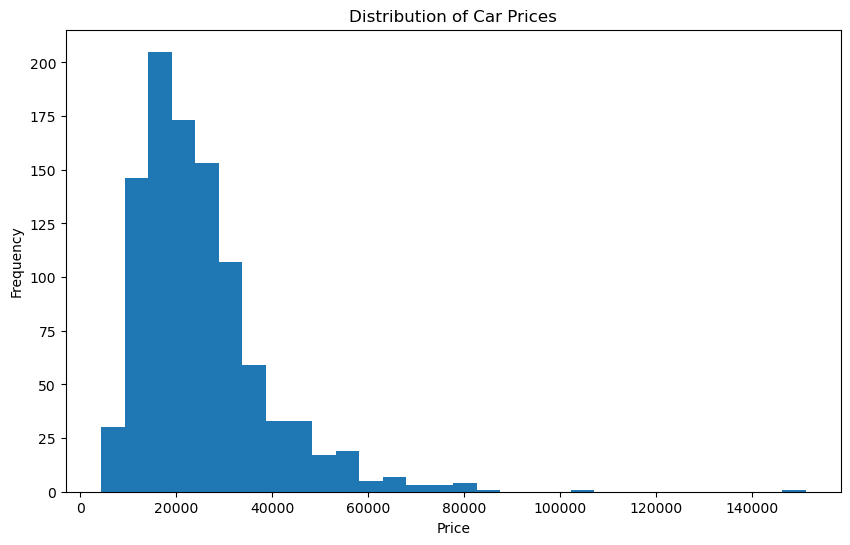

In [6]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

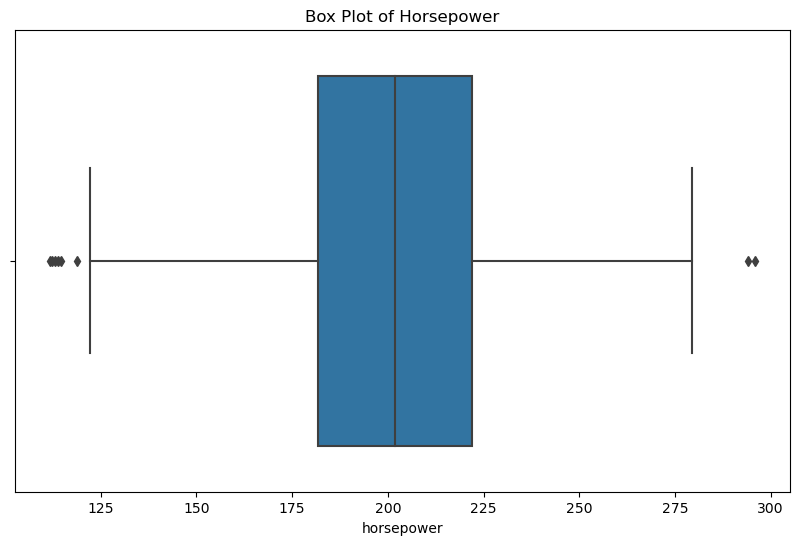

In [7]:
# Box plot

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['horsepower'])
plt.title('Box Plot of Horsepower')
plt.show()

#### For Categorical Variables:

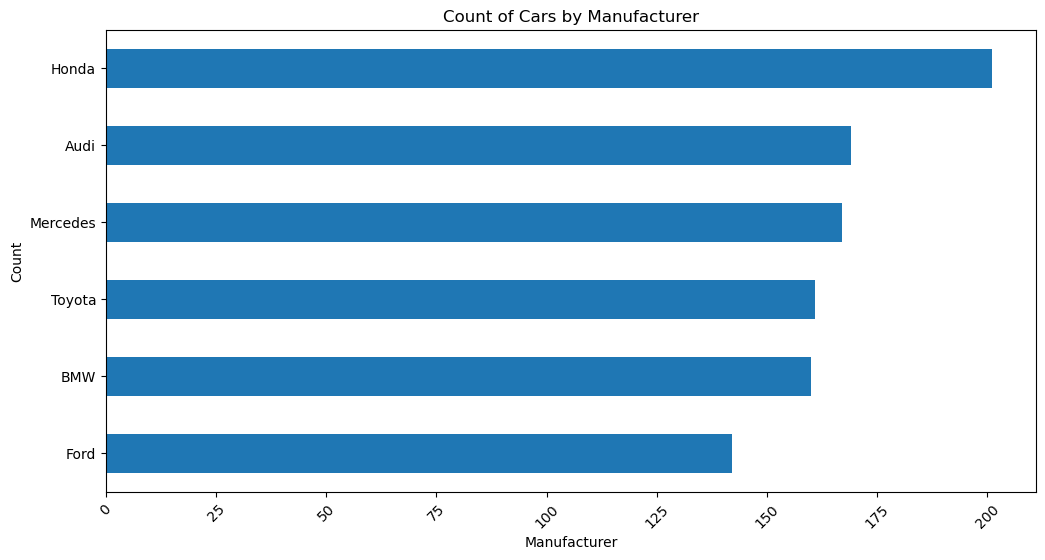

In [11]:
# Bar plot

plt.figure(figsize=(12, 6))
df['manufacturer'].value_counts(ascending=True).plot(kind='barh')
plt.title('Count of Cars by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Checking for Normality

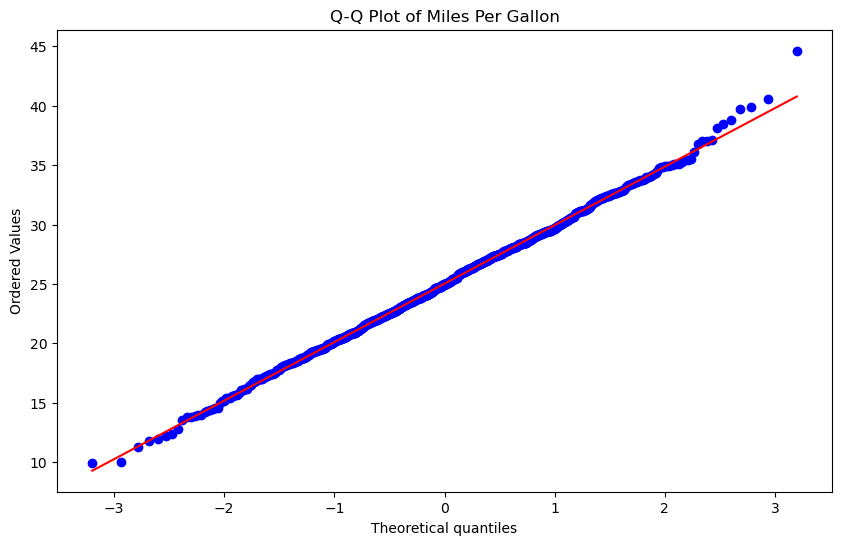

In [12]:
# Q-Q plot

from scipy import stats

plt.figure(figsize=(10, 6))
stats.probplot(df['mpg'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Miles Per Gallon")
plt.show()

In [13]:
# Shapiro-Wilk test

_, p_value = stats.shapiro(df['mpg'])
print(f"Shapiro-Wilk test p-value: {p_value}")
print("If p-value > 0.05, the distribution is likely normal.")

Shapiro-Wilk test p-value: 0.7187223434448242
If p-value > 0.05, the distribution is likely normal.


The Shapiro-Wilk test statistic (W) ranges between 0 and 1, where:

- 1 indicates perfect normality, meaning the data perfectly follows a normal distribution.
- Values closer to 1 indicate a closer fit to a normal distribution.
- Values closer to 0 indicate a poor fit to a normal distribution.

## Interpreting the Results

When examining univariate relationships, look for:

- Central Tendency: Where is the "center" of your data?
- Spread: How dispersed is your data?
- Shape: Is it symmetric? Skewed? Bimodal?
- Unusual Values: Are there outliers or unexpected patterns?

For example, if you see that the 'price' variable is right-skewed (long tail on the right), you might consider a log transformation before using it in certain analyses.

## Summary
Examining univariate relationships is a foundational step in EDA. It gives you a solid understanding of each variable in your dataset, which is crucial for making informed decisions in later stages of your analysis. Remember, the goal is to become intimately familiar with your data, one variable at a time!

## Exercise

- Load a dataset of your choice (or use a built-in dataset like iris or titanic).
- Choose one numerical and one categorical variable.
- Perform a univariate analysis on each, including descriptive statistics and at least one visualization.
- Interpret your results: What did you learn about each variable?

# Examine Bivariate Relationships

## Introduction

After exploring individual variables, the next step in Exploratory Data Analysis (EDA) is to examine bivariate relationships. This involves looking at how pairs of variables interact with each other, providing deeper insights into your dataset.

## What are Bivariate Relationships?

Bivariate relationships refer to the associations or connections between two variables in a dataset. 

These relationships can be between:

- Two numerical variables (e.g., price and horsepower)
- A numerical and a categorical variable (e.g., price and manufacturer)
- Two categorical variables (e.g., fuel type and transmission)

## Why is Examining Bivariate Relationships Important?

- Insight Discovery: Reveals patterns and relationships that aren't visible when looking at variables individually.
- Hypothesis Generation: Suggests potential cause-and-effect relationships for further investigation.
- Feature Selection: Helps identify which variables might be most important for predictive modeling.
- Assumption Checking: Many statistical tests and models assume certain relationships between variables.
- Data Quality Assessment: Can reveal data issues like multicollinearity or unexpected relationships.

## How to Examine Bivariate Relationships

In [15]:
# Load Dataset if not already loaded

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

parent_dir = os.path.dirname(os.getcwd())
file_path = os.path.join(parent_dir, 'datasets', 'car_data.csv')
df = pd.read_csv(file_path)

print("Dataset loaded successfully. First few rows:")
print(df.head())

Dataset loaded successfully. First few rows:
          price  horsepower        mpg  age manufacturer fuel_type  \
0  28236.114017  241.980663  21.624109    8         Ford  Gasoline   
1  20555.171637  227.739010  24.277407    6         Audi  Gasoline   
2  30450.091226  201.788911  21.037900   14          BMW  Gasoline   
3  47170.073204  180.591897  23.460192    1         Audi  Gasoline   
4  19592.915242  220.946699  15.531927   19         Ford  Gasoline   

  transmission  
0       Manual  
1    Automatic  
2    Automatic  
3    Automatic  
4    Automatic  


#### Numerical Methods

##### For Two Numerical Variables:

In [16]:
# Correlation Coefficient:
correlation = df['price'].corr(df['horsepower'])
print(f"Correlation between price and horsepower: {correlation:.2f}")

Correlation between price and horsepower: -0.03


Correlation Coefficient

The correlation coefficient, which ranges from -1 to +1, is a normalized measure of the covariance.

- A correlation coefficient of 0 indicates no linear relationship between the variables.
- A correlation coefficient of 1 or -1 indicates a perfect relationship between the variables.
- A correlation coefficient close to +1 or -1 indicates a strong relationship between the variables.


In [17]:
# Covariance:
covariance = df['price'].cov(df['horsepower'])
print(f"Covariance between price and horsepower: {covariance:.2f}")

Covariance between price and horsepower: -10280.57


Covariance values can range from -∞ to +∞, with a negative value indicating a negative relationship and a positive value indicating a positive relationship. The magnitude of the covariance has no direct meaning, and only the sign is relevant.

**Positive Covariance**

Positive covariance denotes a direct relationship between the variables, represented by a positive number.

The greater the positive covariance, the more reliant the relationship.


**Negative Covariance**

Negative covariance denotes an inverse relationship between the variables, represented by a negative number.

The greater the negative covariance, the more reliant the relationship.

##### For Numerical and Categorical Variables:

In [24]:
# Group Statistics

group_stats = df.groupby('manufacturer')['price'].agg(['mean', 'median', 'std']).round(2)
print("Price statistics by manufacturer:")
print(group_stats)

Price statistics by manufacturer:
                  mean    median       std
manufacturer                              
Audi          24490.45  21507.23  12984.34
BMW           24475.73  22556.23  12194.59
Ford          24364.11  21704.21  12212.57
Honda         26392.85  24271.18  14044.85
Mercedes      26370.17  21647.77  17279.10
Toyota        24272.31  21736.39  11645.23


In [25]:
# ANOVA

manufacturers = df['manufacturer'].unique()
price_groups = [df[df['manufacturer'] == m]['price'] for m in manufacturers]
f_statistic, p_value = stats.f_oneway(*price_groups)
print(f"ANOVA results for Price across Manufacturers:")
print(f"F-statistic: {f_statistic:.2f}, p-value: {p_value:.4f}")

ANOVA results for Price across Manufacturers:
F-statistic: 0.99, p-value: 0.4213


Here's how we can interpret these ANOVA results:

The one-way ANOVA was conducted to compare the prices across different manufacturers. 

The results show:

- F-statistic: 0.99
- p-value: 0.4213

To interpret these results:

1. F-statistic: The F-statistic of 0.99 is relatively small, suggesting that there is not much variation between the group means (prices of different manufacturers) compared to the variation within the groups[1][2].

2. p-value: The p-value of 0.4213 is greater than the typical significance level of 0.05. This indicates that the differences in prices between manufacturers are not statistically significant[1][2][4].

Given these results, we can conclude that:

1. There is no statistically significant difference in prices across the different manufacturers.

2. Any observed differences in prices between manufacturers are likely due to random chance rather than a true underlying difference[2][4].

3. We fail to reject the null hypothesis, which typically states that all group means are equal.

4. The data does not provide sufficient evidence to conclude that the manufacturer has a significant effect on the price of the products[1][2].

In practical terms, this suggests that the choice of manufacturer does not significantly impact the pricing of the products in question. However, it's important to note that while there may not be a statistically significant difference, there could still be practical differences in pricing that might be relevant in a business context[2][4].

Remember that ANOVA only tells us if there's a significant difference somewhere among the groups, not which specific groups differ. If the results had been significant, you would typically follow up with post-hoc tests to determine which specific manufacturers differ from each other[1][2][4].

Citations:

[1] https://support.minitab.com/en-us/minitab/help-and-how-to/statistical-modeling/anova/how-to/one-way-anova/interpret-the-results/key-results/

[2] https://surveysparrow.com/blog/anova/

[3] https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics-2.php

[4] https://study.com/skill/learn/how-to-interpret-the-results-of-an-anova-f-test-using-technology-explanation.html

[5] https://www.graphpad.com/guides/prism/latest/statistics/f_ratio_and_anova_table_%28one-way_anova%29.htm

##### For Two Categorical Variables:

In [26]:
# Chi square test

contingency_table = pd.crosstab(df['fuel_type'], df['transmission'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test results for fuel type and transmission:")
print(f"Chi-square statistic: {chi2:.2f}, p-value: {p_value:.4f}")

Chi-square test results for fuel type and transmission:
Chi-square statistic: 3.12, p-value: 0.3736


Here's how to interpret these results:

1. Chi-square statistic:
   The chi-square statistic of 3.12 measures the overall difference between the observed frequencies and the expected frequencies in the contingency table of fuel type and transmission. A larger value would indicate a greater difference between observed and expected frequencies.

2. p-value:
   The p-value of 0.3736 is crucial for interpretation. This value is higher than the typical significance levels (0.05 or 0.01) used in statistical testing.

Interpretation:

1. Statistical Significance:
   Since the p-value (0.3736) is greater than the common significance level of 0.05, we fail to reject the null hypothesis. This means that the observed difference between fuel type and transmission is not statistically significant.

2. Independence:
   The results suggest that there is no significant association between fuel type and transmission type. In other words, the choice of fuel type appears to be independent of the transmission type, and vice versa.

3. Practical Implications:
   - The data does not provide evidence of a relationship between fuel type and transmission type.
   - Any observed differences in the distribution of fuel types across different transmission types (or vice versa) are likely due to random chance rather than a true underlying association.

4. Caution:
   While the test doesn't show a significant relationship, it doesn't prove that there is absolutely no relationship. It only indicates that if there is a relationship, it's not strong enough to be detected with this sample size and at this significance level.

5. Further Considerations:
   - It might be worth examining the contingency table to see if there are any notable patterns, even if they're not statistically significant.
   - Consider whether the sample size was large enough to detect a meaningful difference if one exists.

In summary, based on these chi-square test results, we don't have sufficient evidence to conclude that there's a significant association between fuel type and transmission type in the dataset. The choice of fuel type appears to be independent of the transmission type, and any observed differences are likely due to random variation.

### Visualization Techniques

#### For Two Numerical Variables:

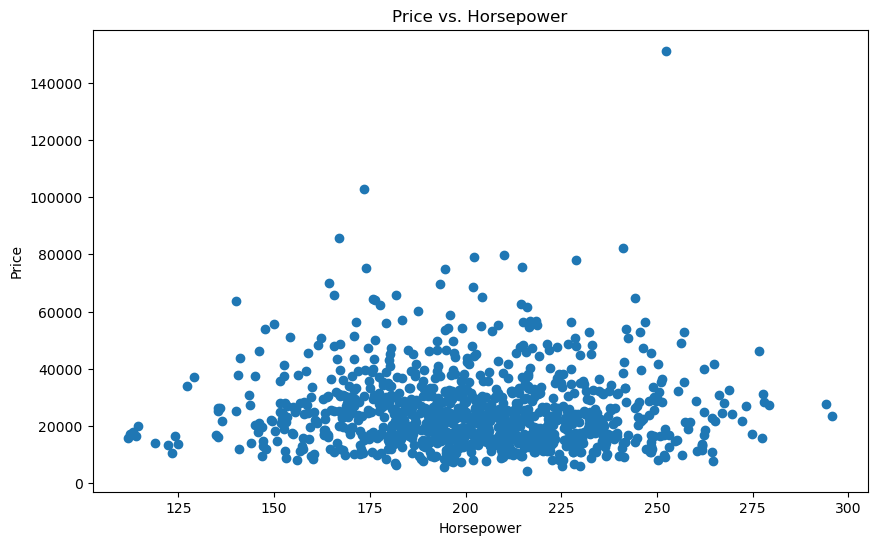

In [27]:
# Scatterplot

plt.figure(figsize=(10, 6))
plt.scatter(df['horsepower'], df['price'])
plt.title('Price vs. Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

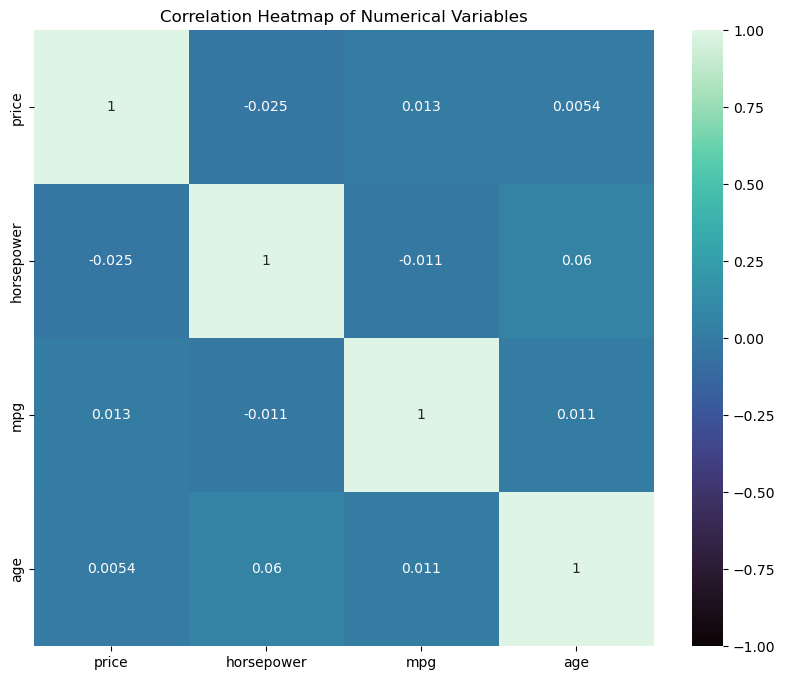

In [33]:
# Heatmap (for multiple numerical variables):

correlation_matrix = df[['price', 'horsepower', 'mpg', 'age']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

#### For Numerical and Categorical Variables:

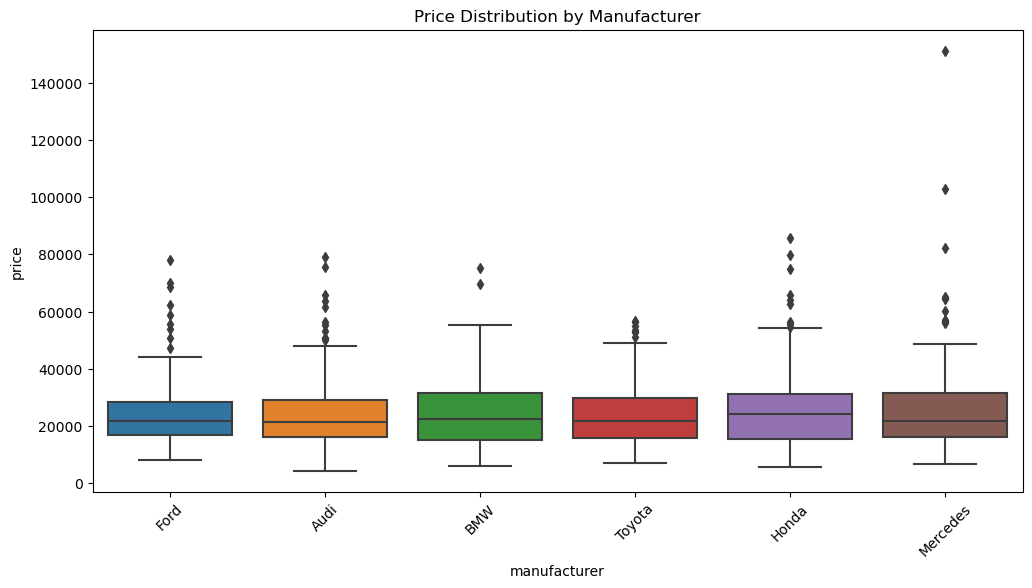

In [35]:
# Box Plot

plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='price', data=df)
plt.title('Price Distribution by Manufacturer')
plt.xticks(rotation=45)
plt.show()

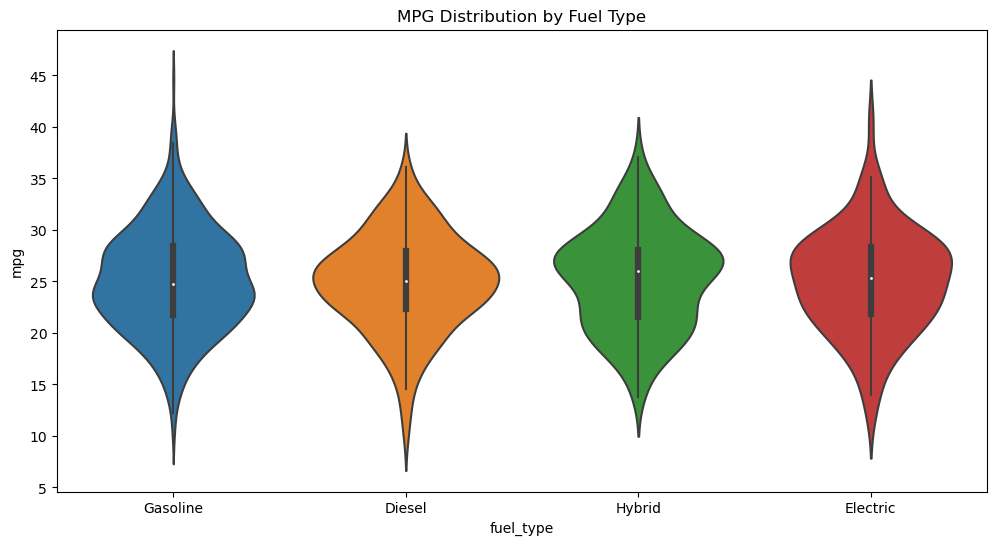

In [36]:
# Violin Plot

plt.figure(figsize=(12, 6))
sns.violinplot(x='fuel_type', y='mpg', data=df)
plt.title('MPG Distribution by Fuel Type')
plt.show()

# Violin Plot Interpretation Cheatsheet

| **Feature**         | **Description**                                                                                 | **What to Look Out For**                                                                       |
|---------------------|-------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------|
| **Shape**           | Width represents the density of data points at different values. Wider sections indicate higher density.  | Identify where the distribution is most concentrated; observe skewness and modality (uni- or bimodal).   |
| **Median**          | Often shown as a white dot or a central line within the thick bar, representing the middle value of the data. | Check the central tendency of the data. Compare medians across different groups.              |
| **Interquartile Range (IQR)** | Thick black bar showing the range between the 25th percentile (Q1) and the 75th percentile (Q3). Central 50% of the data. | Assess the spread and variability of the central half of the data. Narrow IQR indicates less variability. |
| **Overall Range**   | Thin line (whisker) extending from the thick bar, indicating the full spread of the data (excluding outliers). | Understand the full spread and range of the data. Look for any extreme values.                |
| **Outliers**        | Data points outside the typical range, sometimes marked separately.                             | Identify any unusual or extreme values that could affect the interpretation of the data.      |
| **Symmetry**        | Symmetric plots indicate symmetric distributions; asymmetry suggests skewness.                  | Look for balance around the center line. Asymmetry indicates potential skew in the data.      |
| **Peak(s)**         | Peaks indicate the most common values. One peak suggests unimodal distribution; multiple peaks suggest multimodal distribution. | Note the number and location of peaks to understand common values and distribution shape.     |
| **Width Variability** | Changes in width along the y-axis indicate varying densities across values.                    | Observe where density increases or decreases. Consistent width suggests uniform density.      |


# Correlations

# Aggregates